In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
claimants = pd.read_csv("/content/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claimants.shape

(1340, 7)

In [5]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1) # inplace=T means within the same dataset it removes the column

In [6]:
#Shape of the data set
claimants.shape

(1340, 6)

In [7]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [8]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [9]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [10]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:] # Indepedendent variable set - CLMSEX	CLMINSUR	SEATBELT	CLMAGE	LOSS
Y = claimants.iloc[:,0] # Dependent variable set - ATTORNEY

In [11]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [12]:
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [13]:
#Logistic regression and fit the model
classifier = LogisticRegression() # initialize the model i.e. called instance creation of class object.
# First create object 'classifier' for class LogisticRegression
classifier.fit(X,Y) # Then use this object to fit the model. This is the std methodology to build any algo. in sklearn

LogisticRegression()

In [14]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [15]:
y_pred # y hat values for x

array([0, 1, 1, ..., 1, 0, 1])

In [16]:
y_pred_df= pd.DataFrame({'Y': Y,
                         'Yhat': classifier.predict(X)})

In [17]:
y_pred_df

,Y,Yhat
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [18]:
# Confusion Matrix for the model accuracy  TP   FP
#                                          FN   TN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
((381+395)/(381+197+123+395))*100 #Accuracy

70.8029197080292

In [ ]:
# ROC Curve

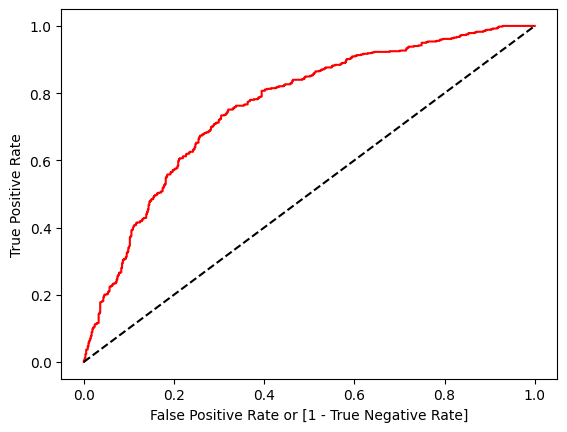

In [19]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
# we want to predict probability values for x data
# predict_proba returns probability estimates for all classes
# and the results are ordered by the label of classes i.e. 0 and 1.
# [:,1] will get the predicted probabilities of the positive label only
# here we will get false positive rate, true positive rate and threshold values
auc = roc_auc_score(Y, y_pred)# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # red one is roc curve

In [20]:
auc

0.7108589063606365